In [1]:
import numpy as np
from urllib import request
import gzip
import pickle

filenames = ["train-images-idx3-ubyte.gz", "t10k-images-idx3-ubyte.gz", 
            "train-labels-idx1-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]

folder = './dataset/'
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filenames:
        print("Downloading " + name + "...")
        request.urlretrieve(base_url + name, folder + name)
    print("Download complete.")

download_mnist()

Download complete.


In [3]:
# load training images
with gzip.open('./dataset/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,784)
    
print(X_train.shape)

(60000, 784)


In [4]:
# load training images
with gzip.open('./dataset/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(60000,28*28)

# load testing images
with gzip.open('./dataset/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(10000,28*28)

# load training labels
with gzip.open('./dataset/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('./dataset/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    
# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
# load training images
with gzip.open('./dataset/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

# load testing images
with gzip.open('./dataset/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

# load training labels
with gzip.open('./dataset/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('./dataset/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

np.save('./dataset/X_train.npy', X_train)
np.save('./dataset/y_train.npy', y_train)
np.save('./dataset/X_test.npy', X_test)
np.save('./dataset/y_test.npy', y_test)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
from PIL import Image
X_train = np.load('./dataset/X_train.npy', allow_pickle=True)
print(X_train.shape)

for i in range(10):
    im = Image.fromarray(X_train[i].reshape(28,28))
    im.save("./dataset/images/image_" + str(i) +".jpg")

(60000, 784)


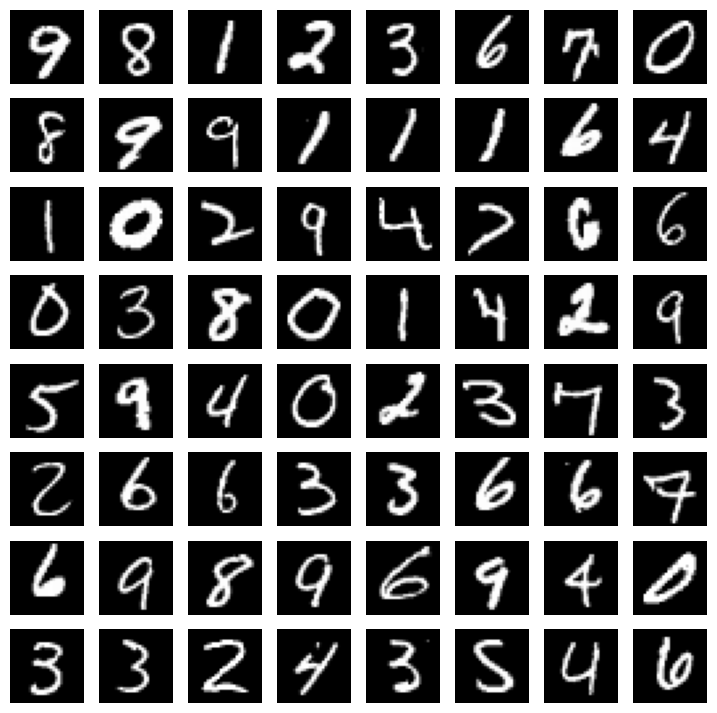

In [8]:
# dùng vẽ đồ thị, hình ảnh
import matplotlib.pyplot as plt 

# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 60.000 phần tử
indices = list(np.random.randint(60000, size=64))

fig = plt.figure(figsize=(9,9))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)